In [4]:
import numpy as np
from numpy.random import rand, randn, randint
import random
import matplotlib.pyplot as plt
from numpy import sqrt


## Single AWE ANcode Decoder(A=53)

In [2]:
def AN_decoder53(residue,quotient):
    s_re=str(residue)
    msg={
        "1": lambda quotient: quotient,
        "2": lambda quotient: quotient,
        "4": lambda quotient: quotient,
        "8": lambda quotient: quotient,
        "16": lambda quotient: quotient,
        "32": lambda quotient: quotient,
        "11": lambda quotient: quotient-1,
        "22": lambda quotient: quotient-2,
        "44": lambda quotient: quotient-4,
        "35": lambda quotient: quotient-9,
        "17": lambda quotient: quotient-19,
        "34": lambda quotient: quotient-38,
        "15": lambda quotient: quotient-77,
        "30": lambda quotient: quotient-154,
        "7": lambda quotient: quotient-309,
        "14": lambda quotient: quotient-618,
        "28": lambda quotient: quotient-1236,
        "3": lambda quotient: quotient-2473,
        "6": lambda quotient: quotient-4946,
        "12": lambda quotient: quotient-9892,
        "24": lambda quotient: quotient-19784,
        "48": lambda quotient: quotient-39568,
        "43": lambda quotient: quotient-79137,
        "33": lambda quotient: quotient-158275,
        "13": lambda quotient: quotient-316551,
        "26": lambda quotient: quotient-633102,
        "52": lambda quotient: quotient+1,
        "51": lambda quotient: quotient+1,
        "49": lambda quotient: quotient+1,
        "45": lambda quotient: quotient+1,
        "37": lambda quotient: quotient+1,
        "21": lambda quotient: quotient+1,
        "42": lambda quotient: quotient+2,
        "31": lambda quotient: quotient+3,
        "9": lambda quotient: quotient+5,
        "18": lambda quotient: quotient+10,
        "36": lambda quotient: quotient+20,
        "19": lambda quotient: quotient+39,
        "38": lambda quotient: quotient+78,
        "23": lambda quotient: quotient+155,
        "46": lambda quotient: quotient+310,
        "39": lambda quotient: quotient+619,
        "25": lambda quotient: quotient+1237,
        "50": lambda quotient: quotient+2474,
        "47": lambda quotient: quotient+4947,
        "41": lambda quotient: quotient+9893,
        "29": lambda quotient: quotient+19785,
        "5": lambda quotient: quotient+39569,
        "10": lambda quotient: quotient+79138,
        "20": lambda quotient: quotient+158276,
        "40": lambda quotient: quotient+316552,
        "27": lambda quotient: quotient+633103,
        "0" :lambda quotient: quotient,
    }[s_re](quotient)
    msg
    return int(msg)

def Barret_q_53(x):
    x = np.int64(x)
    q = (x * 316551) >> 24
    r = x - q * 53
    if r < 53:
        return (r,q)
    else:
        return (r-53,q+1)

In [3]:
# 傳遞資料為0~262143(18-bits)的無號數整數
message=[]
message_count=1000000
for i in range(message_count):
    message.append(random.randint(0,262143))

## A=53乘積編碼
codeword53=[]
for element in message:
    codeword53.append(element*53)
    
#turn *53 into binary
codeword53_bin=[]
for ele in codeword53:
    s='{0:024b}'.format(ele)
    codeword53_bin.append(s)
#codeword53_bin


#can be replaced by np.reshape
bit53_part=[]
for c_bin in codeword53_bin:
    for single_bit in c_bin:
            bit53_part.append(int(single_bit))
#transmition bit
tran53=[]
for b in bit53_part:
    if b==1:
        tran53.append(sqrt(1))
    else:
        tran53.append(-sqrt(1))
        


In [4]:
N = message_count*24
EbNodB_range = range(0,19)
itr = len(EbNodB_range)
print(itr)
ber = [None]*itr
uncode_ber=[None]*itr
bler=[None]*itr

two_d_array_bler53=[None]*itr
q_ber53=[None]*itr

19


In [5]:
#transmission part 
for n in range (0, itr): 
    EbNodB = EbNodB_range[n]   
    EbNo=10.0**(EbNodB/10.0)
    #input
    uncode_bit = 2 * (rand(N) >= 0.5) - 1
    x53=tran53  
    
    #AWGN
    noise_std = 1/sqrt(2*EbNo)
    ## 雜訊強度增加2倍
    noise_std *= 2
    uncode_bit_noise=uncode_bit + noise_std * randn(N)

    y53 = x53 + noise_std * randn(N)
    #BPSK decode
    ###### AN code receive decode for A=13 ##########
    y53_d = 2 * (y53 >= 0) - 1    
    receive53=[]
    for receive_bit in y53_d:
        if(receive_bit==1):
            receive53.append(1)
        else:
            receive53.append(0)
    ################################################
    

    ########### uncode_receive decode##############
    uncode_bit_receive = 2 * (uncode_bit_noise >= 0) - 1
    uncode_receive_decode=[]
    for receive_bit in uncode_bit_receive:
        if(receive_bit==1):
            uncode_receive_decode.append(1)
        else:
            uncode_receive_decode.append(-1)
    ############################################
    

    #reshape
    temp53 = np.reshape(receive53, (message_count,24))
    #bit to decimal
    receive53_decimal = []
    

    for ele in temp53:
        int_out=0
        for ind,val in enumerate (ele):        
            int_out=2**(23-ind)*val+int_out
        receive53_decimal.append(int_out)

    # 2d array 
    decode53_num_msg=[]
    decode53_num_codeword=[]
    q53_check_list=[]
    #10x10x2 array
    for i in range(10000):
        receive53_decimal_100=[]
        receive53_decimal_100=receive53_decimal[0+100*i:100+100*i]

        rq_table=np.zeros((10,10,2),int)
        
        r53_list=[]
        q53_list=[]

        for ele in receive53_decimal_100:
            r,q=Barret_q_53(ele)
            r53_list.append(r)
            q53_list.append(q)

            q53_check_list.append(q)
            
        #put r,q into 3d rq array table
        for i in range(100):
            rq_table[i//10,i%10]=[r53_list[i],q53_list[i]]  

        error53_row=[]
        error53_col=[]
        for i in range(10):
            s_r53=sum(rq_table[i,:,0]) #sum of residue at i row
            s_c53=sum(rq_table[:,i,0]) #sum of residue at i colunm
            error53_row.append(s_r53)
            error53_col.append(s_c53)
        #turn into true false
        for ind,val in enumerate(error53_row):
            if(val!=0):
                error53_row[ind]=True
            else:
                error53_row[ind]=False

        for ind,val in enumerate(error53_col):
            if(val!=0):
                error53_col[ind]=True
            else:
                error53_col[ind]=False
        #find error location and return the first value to ANdecoder
        true_false_table53_for_row_col=np.zeros((10,10),bool)
        # row and colunm to find error location
        for i in range(10):
            for j in range(10):
                true_false_table53_for_row_col[i,j]=error53_row[i] and error53_col[j]

        true_false_table53_for_row_col=true_false_table53_for_row_col.reshape(100,1)
        error_index_from_TF53_table=-1
        #find the fisrt error location and return index value to ANdecoder
        for ind,ele in enumerate(true_false_table53_for_row_col):
            if(ele):
                error_index_from_TF53_table=ind
                break

        if(error_index_from_TF53_table==-1):
            decode53_msg100=q53_list
            decode53_num_msg.extend(decode53_msg100)
            #print(len(decode53_num_msg),"no error")
        else:
            #correct the error value and return msg
            error_codeword=receive53_decimal_100[error_index_from_TF53_table]
            r,q=Barret_q_53(error_codeword)
            corrected_value=AN_decoder53(r,q)
            q53_list[ind]=corrected_value
            decode53_msg100=q53_list
            decode53_num_msg.extend(decode53_msg100)
            #print(len(decode13_num_msg),"error")
    

   
    ## 2d BLER #########################
    BLER53_ERROR=0
    for c in range(len(decode53_num_msg)):
        if(decode53_num_msg[c] !=message[c]):
            BLER53_ERROR=BLER53_ERROR+1  
    two_d_array_bler53[n] =1.0 * BLER53_ERROR / message_count
    ########################################
    #uncode BER
    uncode_error =(uncode_bit !=uncode_receive_decode).sum()
    uncode_ber[n]=1.*uncode_error/N
    
    q53_num=0
    for i in range(len(decode53_num_msg)):
        if(message[i]!=q53_check_list[i]):
            q53_num=q53_num+1

    q_ber53[n]=1.*q53_num/len(decode53_num_msg)
    



    
    print ("EbNodB:", EbNodB)
    print("Uncoded Error probability", uncode_ber[n])
    print ("Error probability without decoder:", q_ber53[n] )
    print ("Error probability with decoder A=53:", two_d_array_bler53[n] )

    

EbNodB: 0
Uncoded Error probability 0.23988445833333333
Error probability without decoder: 0.995482
Error probability with decoder A=53: 0.995383
EbNodB: 1
Uncoded Error probability 0.21373783333333332
Error probability without decoder: 0.991489
Error probability with decoder A=53: 0.991324
EbNodB: 2
Uncoded Error probability 0.18667908333333333
Error probability without decoder: 0.983933
Error probability with decoder A=53: 0.983576
EbNodB: 3
Uncoded Error probability 0.15886545833333332
Error probability without decoder: 0.969481
Error probability with decoder A=53: 0.968858
EbNodB: 4
Uncoded Error probability 0.13128020833333334
Error probability without decoder: 0.94228
Error probability with decoder A=53: 0.941202
EbNodB: 5
Uncoded Error probability 0.1041885
Error probability without decoder: 0.894647
Error probability with decoder A=53: 0.892912
EbNodB: 6
Uncoded Error probability 0.07919391666666667
Error probability without decoder: 0.816231
Error probability with decoder A=53

In [6]:
print(two_d_array_bler53)

[0.995383, 0.991324, 0.983576, 0.968858, 0.941202, 0.892912, 0.813673, 0.698964, 0.549093, 0.384105, 0.232052, 0.117814, 0.046807, 0.011876, 0.00112, 6.3e-05, 1e-06, 0.0, 0.0]


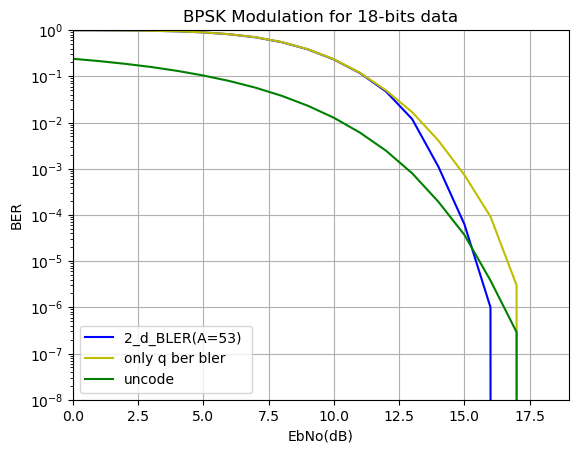

In [14]:
#two_d_BLER13=plt.plot( EbNodB_range, two_d_array_bler13, 'r',label="2_d_BLER(A=13) ")
two_d_BLER53=plt.plot( EbNodB_range, two_d_array_bler53, 'b',label="2_d_BLER(A=53) ")
only_q53=plt.plot( EbNodB_range, q_ber53, 'y',label="only q ber bler")
uncode_ber_line=plt.plot(EbNodB_range,uncode_ber,'g',label="uncode")

#hamming_ber_line=plt.plot(EbNodB_range, hamming_ber, 'y',label="(7,4)hamming_ber")
plt.legend()
#plt.plot(EbNodB_range, an_decode_ber, 'b')
plt.axis([0, itr, 1e-8, 1])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BER')
plt.grid(True)
plt.title('BPSK Modulation for 18-bits data')
plt.savefig("BPSK with A=53(18bits)")
plt.show()

### 使用查找表更正
* Function Definition

In [5]:
import math
import numpy as np

def decimal_to_binary(decimal_number):
    if decimal_number == 0:
        return "0"
    # 處理正數：直接轉換
    if decimal_number > 0:
        return bin(decimal_number)[2:]  # 移除 "0b" 前綴
       # 處理負數：自動計算所需位元數（2's complement）
    abs_value = abs(decimal_number)
    bits = abs_value.bit_length() + 1  # 負數多一個符號位元
    two_complement_value = (1 << bits) + decimal_number
    
    return bin(two_complement_value)[2:]  # 移除 "0b" 前綴

def bits_needed(number):
    if number < 0:
        raise ValueError("2's complement is not available")  # 如果輸入負數，拋出錯誤
    if number == 0:
        return 1  # 0 需要 1 個位元
    
    # 計算位元數
    bits = math.floor(math.log2(number)) + 1
    return bits

def bits_range(bits, signed=False):     ## 可選擇設定 有號數 或 無號數
    if bits <= 0:
        return "位元數必須為正整數！"
    
    if signed:
        # 二補數範圍: -2^(bits-1) 到 2^(bits-1)-1
        min_value = -(2**(bits - 1))
        max_value = 2**(bits - 1) - 1
    else:
        # 無符號範圍: 0 到 2^bits - 1
        min_value = 0
        max_value = 2**bits - 1

    return min_value, max_value

## 把重複的 AWE 去除
def remove_duplicates(input_list):
    unique_list = []
    for number in input_list:
        if number not in unique_list:
            unique_list.append(number)
    return sorted(unique_list)

def custom_mod(a, b):
    if b == 0:
        return "錯誤：除數不能為零！"
    # 計算商和餘數，修正餘數計算邏輯
    quotient = a // b
    remainder = a - b * quotient
    # 修正負餘數的情況
    if remainder > 0 and a < 0:
        remainder -= abs(b)
        quotient += 1
    return remainder

def remainder_unique(input_list):
    # 使用集合判斷元素是否有重複
    return len(input_list) == len(set(input_list))


def create_mapping(source_list, address_map):
    """
    建立值到位址和位址到值的雙向映射。
    若 address_map 中某位址沒有對應值，則該位址的值為 0。
    
    參數:
    source_list (list): 原始資料列表。
    address_map (list): 位址映射列表。
    
    回傳:
    tuple: (值到位址的映射, 位址到值的映射)
    """
    # 初始化值到位址的映射
    value_to_address = {value: addr for value, addr in zip(source_list, address_map)}
    
    # 初始化位址到值的映射，未指定的位址預設為 0
    max_address = max(address_map)  # 確保涵蓋所有位址
    address_to_value = {addr: 0 for addr in range(max_address + 1)}  # 預設為 0
    for value, addr in zip(source_list, address_map):
        address_to_value[addr] = value  # 更新有指定值的位址

    return value_to_address, address_to_value
def decimal_to_binary(decimal_number):
    if decimal_number == 0:
        return "0"
    # 處理正數：直接轉換
    if decimal_number > 0:
        return bin(decimal_number)[2:]  # 移除 "0b" 前綴
       # 處理負數：自動計算所需位元數（2's complement）
    abs_value = abs(decimal_number)
    bits = abs_value.bit_length() + 1  # 負數多一個符號位元
    two_complement_value = (1 << bits) + decimal_number
    
    return bin(two_complement_value)[2:]  # 移除 "0b" 前綴

def bits_needed(number):
    if number < 0:
        raise ValueError("2's complement is not available")  # 如果輸入負數，拋出錯誤
    if number == 0:
        return 1  # 0 需要 1 個位元
    
    # 計算位元數
    bits = math.floor(math.log2(number)) + 1
    return bits

def bits_range(bits, signed=False):     ## 可選擇設定 有號數 或 無號數
    if bits <= 0:
        return "位元數必須為正整數！"
    
    if signed:
        # 二補數範圍: -2^(bits-1) 到 2^(bits-1)-1
        min_value = -(2**(bits - 1))
        max_value = 2**(bits - 1) - 1
    else:
        # 無符號範圍: 0 到 2^bits - 1
        min_value = 0
        max_value = 2**bits - 1

    return min_value, max_value

## 把重複的 AWE 去除
def remove_duplicates(input_list):
    unique_list = []
    for number in input_list:
        if number not in unique_list:
            unique_list.append(number)
    return sorted(unique_list)

def custom_mod(a, b):
    if b == 0:
        return "錯誤：除數不能為零！"
    # 計算商和餘數，修正餘數計算邏輯
    quotient = a // b
    remainder = a - b * quotient
    # 修正負餘數的情況
    if remainder > 0 and a < 0:
        remainder -= abs(b)
        quotient += 1
    return remainder

def remainder_unique(input_list):
    # 使用集合判斷元素是否有重複
    return len(input_list) == len(set(input_list))


In [6]:
### 輸入數值為data, ANcode的A為AN
### 乘完A後的數值為 input
data = 262143
AN = 6311     ## AN:4493 只適用輸入為0~6311
input = data*AN
bits = bits_needed(input)

### 1-bit AWE:
AWE_1=[]
e1=0     ## 錯誤數量
e1_data=[]
for i in range(0, bits):
    AWE_1.insert(e1 , input + 2**i)
    e1_data.insert(e1, 2**i)
    e1 = e1 + 1
    AWE_1.insert(e1 , input - 2**i)
    e1_data.insert(e1, -2**i)
    e1 = e1 + 1
    
### 2-bit AWE:
AWE_2=[]
e2=0     ## 錯誤數量
p=0      ## 錯誤位置
e2_data=[]
for i in range(0, bits):
    for j in range(i+1, bits):
        AWE_2.insert(e2 , (input + 2**i + 2**j))
        e2_data.insert(e2 , (2**i + 2**j))        
        print(f"第 {e2} 筆錯誤資料: {AWE_2[e2]}")
        print(f"第 {e2} 筆算術錯誤: {e2_data[e2]}")
        e2 = e2 + 1
        AWE_2.insert(e2 , (input + 2**i - 2**j))
        e2_data.insert(e2 , (2**i - 2**j))        
        print(f"第 {e2} 筆錯誤資料: {AWE_2[e2]}")
        print(f"第 {e2} 筆算術錯誤: {e2_data[e2]}")
        e2 = e2 + 1
        AWE_2.insert(e2 , (input - 2**i + 2**j))
        e2_data.insert(e2 , (-2**i + 2**j))                
        print(f"第 {e2} 筆錯誤資料: {AWE_2[e2]}")
        print(f"第 {e2} 筆算術錯誤: {e2_data[e2]}")
        e2 = e2 + 1
        AWE_2.insert(e2 , (input - 2**i -2**j))
        e2_data.insert(e2 , (-2**i - 2**j))
        print(f"第 {e2} 筆錯誤資料: {AWE_2[e2]}")
        print(f"第 {e2} 筆算術錯誤: {e2_data[e2]}")
        e2 = e2 + 1
        p = p + 1
        
## 把list:AWE_1 和 list:AWE_2合併
AWE = AWE_1 + AWE_2
e_total = e1_data + e2_data
## 把重複的 AWE 去除
new_AWE = remove_duplicates(AWE)
new_e_total = remove_duplicates(e_total)
AWE_count = np.size(new_AWE)
e_count = np.size(new_e_total)

### 模AN, 使用一般mod函數和 Barret reduction 比較
remainder = []
for m in range(0,AWE_count):
    mod = custom_mod(new_AWE[m], AN)
    remainder.append(mod)

print("錯誤資料對AN取完模數:\n",remainder)

##############################################################
### Barret reduction ###
def Barret_q_6311(x):
    x = np.int64(x)      
    q = (x * 340276 ) >> 31        ## (2^31)//4493後, 右移31次 
    r = x - q * 6311
    if r < 6311:
        return (r,q)
    else:
        return (r - 6311,q+1)
    
Barret_remainder = []
for m in range(0,AWE_count):
    Barret_r,Barret_q = Barret_q_6311(new_AWE[m])
    Barret_remainder.append(Barret_r)
    
print("Barret reduction對錯誤資料取完模數:\n",Barret_remainder)
print("Barret reduction是否可以使用:", Barret_remainder == remainder)
#################################################################
print("所有餘數(一般mod函數)是否完全相異:", remainder_unique(remainder))
print("所有餘數(Barret reduction)是否完全相異:", remainder_unique(Barret_remainder))
print("所有的AWE:\n", new_e_total)
print(np.size(remainder))

### 建立錯誤映射表(LUT)
## Decoder
AWE_to_remainder, remainder_to_AWE = create_mapping(new_e_total, Barret_remainder)

## example
example_r1 = Barret_remainder[0]
example_r2 = Barret_remainder[1]
print(f"輸入餘數 {example_r1}, 對應算術錯誤: {remainder_to_AWE[example_r1]}")
print(f"輸入餘數 {example_r2}, 對應算術錯誤: {remainder_to_AWE[example_r2]}")

Raw_data1 = new_AWE[0]-remainder_to_AWE[example_r1]
Raw_data2 = new_AWE[1]-remainder_to_AWE[example_r2]
print(Raw_data1)
print(Raw_data2)
print("更正是否正確:", input == Raw_data1)

第 0 筆錯誤資料: 1654384476
第 0 筆算術錯誤: 3
第 1 筆錯誤資料: 1654384472
第 1 筆算術錯誤: -1
第 2 筆錯誤資料: 1654384474
第 2 筆算術錯誤: 1
第 3 筆錯誤資料: 1654384470
第 3 筆算術錯誤: -3
第 4 筆錯誤資料: 1654384478
第 4 筆算術錯誤: 5
第 5 筆錯誤資料: 1654384470
第 5 筆算術錯誤: -3
第 6 筆錯誤資料: 1654384476
第 6 筆算術錯誤: 3
第 7 筆錯誤資料: 1654384468
第 7 筆算術錯誤: -5
第 8 筆錯誤資料: 1654384482
第 8 筆算術錯誤: 9
第 9 筆錯誤資料: 1654384466
第 9 筆算術錯誤: -7
第 10 筆錯誤資料: 1654384480
第 10 筆算術錯誤: 7
第 11 筆錯誤資料: 1654384464
第 11 筆算術錯誤: -9
第 12 筆錯誤資料: 1654384490
第 12 筆算術錯誤: 17
第 13 筆錯誤資料: 1654384458
第 13 筆算術錯誤: -15
第 14 筆錯誤資料: 1654384488
第 14 筆算術錯誤: 15
第 15 筆錯誤資料: 1654384456
第 15 筆算術錯誤: -17
第 16 筆錯誤資料: 1654384506
第 16 筆算術錯誤: 33
第 17 筆錯誤資料: 1654384442
第 17 筆算術錯誤: -31
第 18 筆錯誤資料: 1654384504
第 18 筆算術錯誤: 31
第 19 筆錯誤資料: 1654384440
第 19 筆算術錯誤: -33
第 20 筆錯誤資料: 1654384538
第 20 筆算術錯誤: 65
第 21 筆錯誤資料: 1654384410
第 21 筆算術錯誤: -63
第 22 筆錯誤資料: 1654384536
第 22 筆算術錯誤: 63
第 23 筆錯誤資料: 1654384408
第 23 筆算術錯誤: -65
第 24 筆錯誤資料: 1654384602
第 24 筆算術錯誤: 129
第 25 筆錯誤資料: 1654384346
第 25 筆算術錯誤: -127
第 26 筆錯誤資料: 1654384600
第 26 筆

## 使用查找表更正2-bits Error 的BLER

In [7]:
# 傳遞資料為0~262143(18-bits)的無號數整數
message=[]
message_count=1000000
for i in range(message_count):
    message.append(random.randint(0,262143))

## DEC_AN=6311乘積編碼
codeword6311=[]
for element in message:
    codeword6311.append(element*6311)
    
#turn *6311 into binary
codeword6311_bin=[]
for ele in codeword6311:
    s='{0:031b}'.format(ele)
    codeword6311_bin.append(s)
#codeword6311_bin


#can be replaced by np.reshape
bit6311_part=[]
for c_bin in codeword6311_bin:
    for single_bit in c_bin:
            bit6311_part.append(int(single_bit))
#transmition bit
tran6311=[]
for b in bit6311_part:
    if b==1:
        tran6311.append(sqrt(1))
    else:
        tran6311.append(-sqrt(1))


In [8]:
N = message_count*31
EbNodB_range = range(0,19)
itr = len(EbNodB_range)
print(itr)
ber = [None]*itr
uncode_ber=[None]*itr
bler=[None]*itr

two_d_array_bler6311=[None]*itr
q_ber6311=[None]*itr

19


In [9]:
#transmission part 
for n in range (0, itr): 
    EbNodB = EbNodB_range[n]   
    EbNo=10.0**(EbNodB/10.0)
    #input
    uncode_bit = 2 * (rand(N) >= 0.5) - 1
    x6311 = tran6311 
    
    #AWGN
    noise_std = 1/sqrt(2*EbNo)
    ## 雜訊強度增加2倍
    noise_std *= 2
    uncode_bit_noise=uncode_bit + noise_std * randn(N)

    y6311 = x6311 + noise_std * randn(N)
    #BPSK decode
    ###### AN code receive decode for A=6311 ##########
    y6311_d = 2 * (y6311 >= 0) - 1    
    receive6311=[]
    for receive_bit in y6311_d:
        if(receive_bit==1):
            receive6311.append(1)
        else:
            receive6311.append(0)
    ################################################
    

    ########### uncode_receive decode##############
    uncode_bit_receive = 2 * (uncode_bit_noise >= 0) - 1
    uncode_receive_decode=[]
    for receive_bit in uncode_bit_receive:
        if(receive_bit==1):
            uncode_receive_decode.append(1)
        else:
            uncode_receive_decode.append(-1)
    ############################################
    

    #reshape
    temp6311 = np.reshape(receive6311, (message_count, 31))
    
    #bit to decimal
    receive6311_decimal = []
    for ele in temp6311:
        int_out=0
        for ind,val in enumerate (ele):        
            int_out=2**(30-ind)*val+int_out
        receive6311_decimal.append(int_out)

    # 2d array 
    decode6311_num_msg=[]
    decode6311_num_codeword=[]
    q6311_check_list=[]
    #10x10x2 array
    for i in range(10000):
        receive6311_decimal_100=[]
        receive6311_decimal_100=receive6311_decimal[0+100*i:100+100*i]

        rq_table=np.zeros((10,10,2),int)
        
        r6311_list=[]
        q6311_list=[]

        for ele in receive6311_decimal_100:
            r,q=Barret_q_6311(ele)
            r6311_list.append(r)
            q6311_list.append(q)

            q6311_check_list.append(q)
            
        #put r,q into 3d rq array table
        for i in range(100):
            rq_table[i//10,i%10]=[r6311_list[i],q6311_list[i]]  

        error6311_row=[]
        error6311_col=[]
        for i in range(10):
            s_r6311=sum(rq_table[i,:,0]) #sum of residue at i row
            s_c6311=sum(rq_table[:,i,0]) #sum of residue at i colunm
            error6311_row.append(s_r6311)
            error6311_col.append(s_c6311)
        #turn into true false
        for ind,val in enumerate(error6311_row):
            if(val!=0):
                error6311_row[ind]=True
            else:
                error6311_row[ind]=False

        for ind,val in enumerate(error6311_col):
            if(val!=0):
                error6311_col[ind]=True
            else:
                error6311_col[ind]=False
        #find error location and return the first value to ANdecoder
        true_false_table6311_for_row_col=np.zeros((10,10),bool)
        # row and colunm to find error location
        for i in range(10):
            for j in range(10):
                true_false_table6311_for_row_col[i,j] = error6311_row[i] and error6311_col[j]

        true_false_table6311_for_row_col=true_false_table6311_for_row_col.reshape(100,1)
        error_index_from_TF6311_table=-1
        #find the fisrt error location and return index value to ANdecoder
        for ind,ele in enumerate(true_false_table6311_for_row_col):
            if(ele):
                error_index_from_TF6311_table=ind
                break

        if(error_index_from_TF6311_table==-1):
            decode6311_msg100=q6311_list
            decode6311_num_msg.extend(decode6311_msg100)
            #print(len(decode1939_num_msg),"no error")
        else:
            #correct the error value and return msg
            error_codeword=receive6311_decimal_100[error_index_from_TF6311_table]
            r,q=Barret_q_6311(error_codeword)
            ### using LUT to recover it 
            RAW_DATA = np.int64(error_codeword) - np.int64(remainder_to_AWE[r])
            ### mod 6311 to get correct data
            corrected_r,corrected_q = Barret_q_6311(RAW_DATA)
            q6311_list[ind]=corrected_q
            decode6311_msg100=q6311_list
            decode6311_num_msg.extend(decode6311_msg100)
            #print(len(decode13_num_msg),"error")
    

   
    ## 2d BLER #########################
    BLER6311_ERROR=0
    for c in range(len(decode6311_num_msg)):
        if(decode6311_num_msg[c] !=message[c]):
            BLER6311_ERROR=BLER6311_ERROR+1  
    two_d_array_bler6311[n] =1.0 * BLER6311_ERROR / message_count
    ########################################
    ### uncode BER
    uncode_error =(uncode_bit !=uncode_receive_decode).sum()
    uncode_ber[n]=1.*uncode_error/N
    ########################################
    ### no decoder for AN
    q6311_num=0
    for i in range(len(decode6311_num_msg)):
        if(message[i]!=q6311_check_list[i]):
            q6311_num=q6311_num+1

    q_ber6311[n]=1.*q6311_num/len(decode6311_num_msg)
    



    
    print ("EbNodB:", EbNodB)
    print("Uncoded Error probability", uncode_ber[n])
    print ("Error probability without decoder:", q_ber6311[n] )
    print ("Error probability with decoder A=6311:", two_d_array_bler6311[n] )

    

EbNodB: 0
Uncoded Error probability 0.23975312903225807
Error probability without decoder: 0.996037
Error probability with decoder A=6311: 0.995901
EbNodB: 1
Uncoded Error probability 0.21388112903225806
Error probability without decoder: 0.992751
Error probability with decoder A=6311: 0.992473
EbNodB: 2
Uncoded Error probability 0.18678390322580646
Error probability without decoder: 0.986836
Error probability with decoder A=6311: 0.986283
EbNodB: 3
Uncoded Error probability 0.1588719677419355
Error probability without decoder: 0.974863
Error probability with decoder A=6311: 0.973774
EbNodB: 4
Uncoded Error probability 0.13113158064516128
Error probability without decoder: 0.95334
Error probability with decoder A=6311: 0.951382
EbNodB: 5
Uncoded Error probability 0.10439038709677419
Error probability without decoder: 0.914376
Error probability with decoder A=6311: 0.911276
EbNodB: 6
Uncoded Error probability 0.0791198064516129
Error probability without decoder: 0.847951
Error probabili

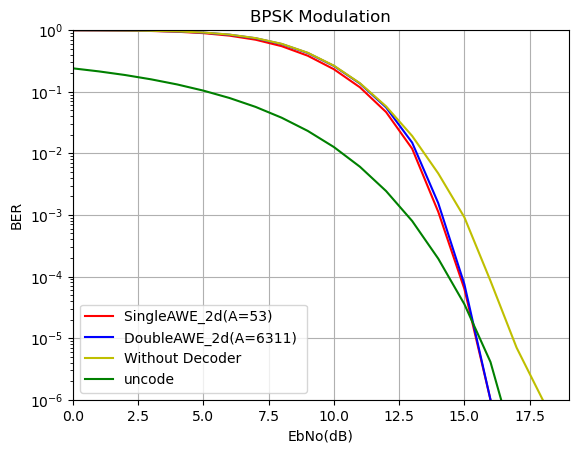

In [17]:
two_d_BLER53=plt.plot( EbNodB_range, two_d_array_bler53, 'r',label="SingleAWE_2d(A=53) ")
two_d_BLER6311=plt.plot( EbNodB_range, two_d_array_bler6311, 'b',label="DoubleAWE_2d(A=6311) ")
only_q6311=plt.plot( EbNodB_range, q_ber6311, 'y',label="Without Decoder")
uncode_ber_line=plt.plot(EbNodB_range,uncode_ber,'g',label="uncode")

plt.legend()
plt.axis([0, itr, 1e-6, 1])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BER')
plt.grid(True)
plt.title('BPSK Modulation')
plt.savefig("BPSK with 6311(18bits)")
plt.show()